In [ ]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import dataframes
df_plays = pd.read_csv('plays.csv')
df_player_play = pd.read_csv('player_play.csv')

#Mark if a play had a motion or not
df_player_play_motion_ids = df_player_play[df_player_play['motionSinceLineset'] == True][['gameId', 'playId']]
df_player_play_motion_ids['has_motion'] = 1
tracking_motion = df_plays.merge(df_player_play_motion_ids, on = ['gameId','playId'], how = 'left')
tracking_motion['has_motion'] = tracking_motion['has_motion'].fillna(0)

#calculate leaguewide EPA on plays with/WO motion
ovr_epa_avg = tracking_motion['expectedPointsAdded'].mean()
motion_epa_avg = tracking_motion[tracking_motion['has_motion'] == 1]['expectedPointsAdded'].mean()
non_motion_epa_avg = tracking_motion[tracking_motion['has_motion'] == 0]['expectedPointsAdded'].mean()
print(f"{ovr_epa_avg} {motion_epa_avg} {non_motion_epa_avg}")

#get NFL team motion pcts and average EPAs
nfl_teams = tracking_motion['possessionTeam'].unique()
motion_pcts = []
epa_avgs = []

for team in nfl_teams:
    team_df = tracking_motion[tracking_motion['possessionTeam'] == team]
    motion_pct = team_df['has_motion'].mean()
    epa_avg = team_df['expectedPointsAdded'].mean()

    #append to lists
    motion_pcts.append(motion_pct)
    epa_avgs.append(epa_avg)

#plot the results
results_df = pd.DataFrame({
    'Team': nfl_teams,
    'Motion Percentage': motion_pcts,
    'Average EPA': epa_avgs
})

plt.figure(figsize=(10, 6))
sns.regplot(data=results_df, x='Motion Percentage', y='Average EPA', scatter_kws={'s': 100}, line_kws={'color': 'red'}, ci=None)

for i, row in results_df.iterrows():
    plt.text(row['Motion Percentage'], row['Average EPA'], row['Team'], fontsize=9, ha='right')

plt.title('Motion Percentage vs Average EPA by Team', fontsize=16)
plt.xlabel('Motion Percentage', fontsize=12)
plt.ylabel('Average EPA on Offense', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [2]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#import dataframes
df_plays = pd.read_csv('plays.csv')
df_player_play = pd.read_csv('player_play.csv')

In [18]:
#Mark if a play had a motion or not
df_player_play_motion_ids = df_player_play[df_player_play['motionSinceLineset'] == True][['gameId', 'playId']]
df_player_play_motion_ids['has_motion'] = 1
tracking_motion = df_plays.merge(df_player_play_motion_ids, on = ['gameId','playId'], how = 'left')
tracking_motion['has_motion'] = tracking_motion['has_motion'].fillna(0)

In [33]:
#calculate leaguewide EPA on plays with/WO motion
ovr_epa_avg = tracking_motion['expectedPointsAdded'].mean()
motion_epa_avg = tracking_motion[tracking_motion['has_motion'] == 1]['expectedPointsAdded'].mean()
non_motion_epa_avg = tracking_motion[tracking_motion['has_motion'] == 0]['expectedPointsAdded'].mean()
print(f"{ovr_epa_avg} {motion_epa_avg} {non_motion_epa_avg}")

-0.021335144375996325 0.08256045453952678 -0.07540989646666103


In [51]:
#get NFL team motion pcts and average EPAs
nfl_teams = tracking_motion['possessionTeam'].unique()
motion_pcts = []
epa_avgs = []

for team in nfl_teams:
    team_df = tracking_motion[tracking_motion['possessionTeam'] == team]
    motion_pct = team_df['has_motion'].mean()
    epa_avg = team_df['expectedPointsAdded'].mean()

    #append to lists
    motion_pcts.append(motion_pct)
    epa_avgs.append(epa_avg)

CIN  : 26.77%   0.048
HOU  : 28.64%   -0.15
KC   : 42.14%   0.2
BAL  : 39.31%   0.033
DET  : 50.47%   -0.0028
IND  : 30.17%   -0.19
ARI  : 23.14%   -0.049
PHI  : 25.19%   0.17
DAL  : 30.36%   -0.047
GB   : 26.20%   -0.11
ATL  : 41.31%   0.018
LV   : 31.76%   0.016
WAS  : 31.19%   -0.094
TEN  : 25.86%   -0.062
NE   : 33.63%   -0.054
LAC  : 25.78%   -0.0026
SEA  : 29.86%   0.13
CLE  : 42.28%   0.057
JAX  : 38.80%   0.054
TB   : 40.70%   -0.057
LA   : 29.04%   -0.13
MIA  : 52.22%   0.078
CHI  : 31.35%   -0.032
NO   : 21.30%   -0.012
CAR  : 38.33%   -0.12
BUF  : 37.43%   0.038
SF   : 35.03%   0.0081
MIN  : 39.39%   -0.026
PIT  : 35.06%   -0.14
NYJ  : 44.43%   -0.1
NYG  : 41.72%   0.012
DEN  : 21.91%   -0.17


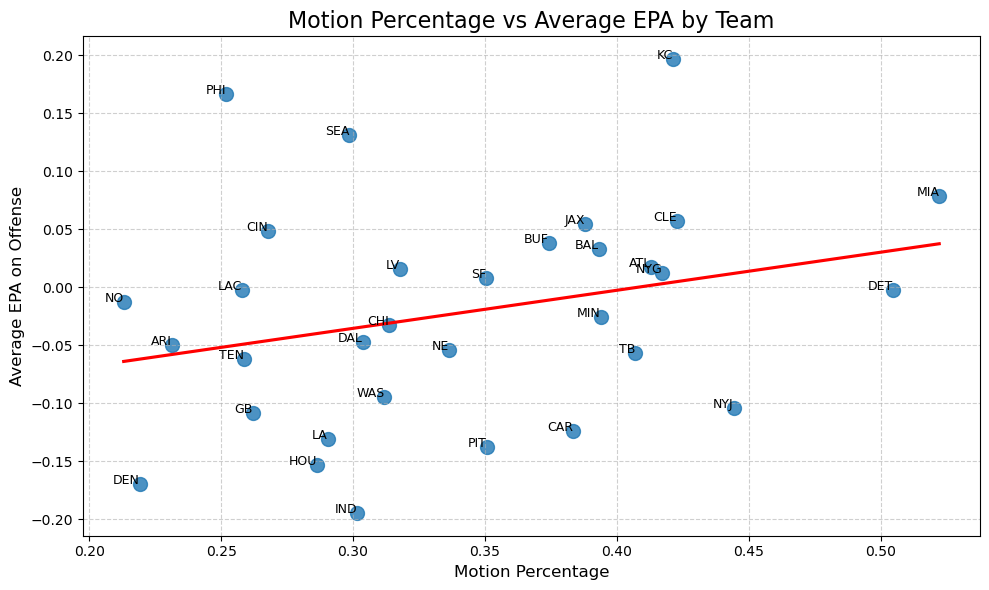

In [62]:
#plot the results
results_df = pd.DataFrame({
    'Team': nfl_teams,
    'Motion Percentage': motion_pcts,
    'Average EPA': epa_avgs
})

plt.figure(figsize=(10, 6))
sns.regplot(data=results_df, x='Motion Percentage', y='Average EPA', scatter_kws={'s': 100}, line_kws={'color': 'red'}, ci=None)

for i, row in results_df.iterrows():
    plt.text(row['Motion Percentage'], row['Average EPA'], row['Team'], fontsize=9, ha='right')

plt.title('Motion Percentage vs Average EPA by Team', fontsize=16)
plt.xlabel('Motion Percentage', fontsize=12)
plt.ylabel('Average EPA on Offense', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


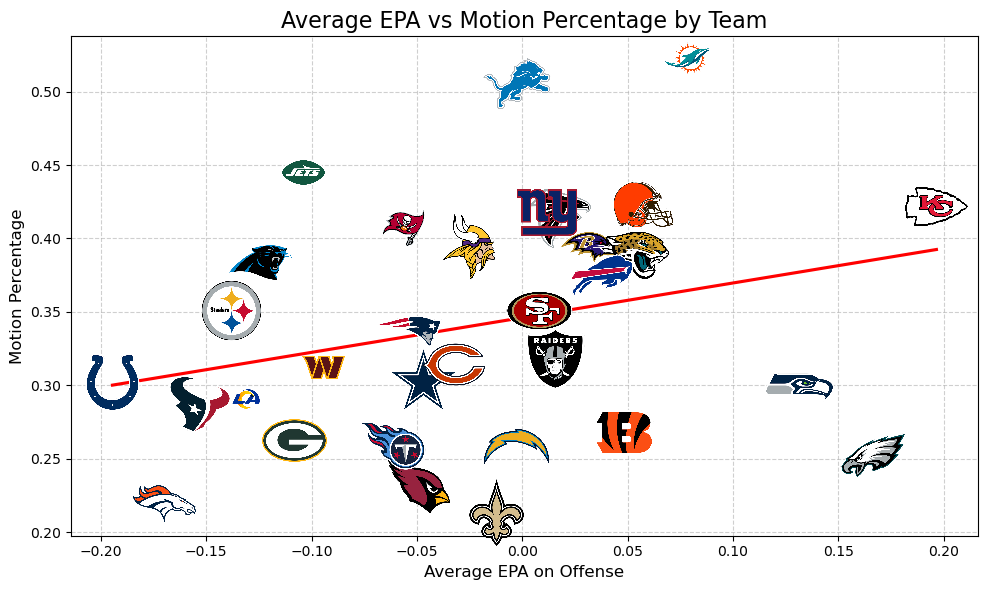

In [112]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plotting the regression line (keep the line if desired)
sns.regplot(
    data=results_df, 
    x='Average EPA', 
    y='Motion Percentage', 
    scatter_kws={'s': 100, 'alpha': 0}, 
    line_kws={'color': 'red'}, 
    ci=None
)

# Add team logos instead of dots with resized images
for i, row in results_df.iterrows():
    img_path = f"logos/{row['Team']}.png"  # Assuming images are in the 'logos' folder and named after the teams
    try:
        img = mpimg.imread(img_path)  # Load the image
        # Resize image to make smaller logos
        imagebox = OffsetImage(img, zoom=0.07)  # Adjust zoom size as needed
        # Create an AnnotationBbox to place the image at the corresponding x, y location
        ab = AnnotationBbox(
            imagebox, 
            (row['Average EPA'], row['Motion Percentage']), 
            frameon=False, 
            xycoords='data', 
            boxcoords="offset points", 
            pad=0
        )
        plt.gca().add_artist(ab)
    except FileNotFoundError:
        print(f"Image for team {row['Team']} not found at path: {img_path}")

# Customize the plot
plt.title('Average EPA vs Motion Percentage by Team', fontsize=16)
plt.xlabel('Average EPA on Offense', fontsize=12)
plt.ylabel('Motion Percentage', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


In [72]:
# Get NFL team motion percentages and average EPAs for motion vs non-motion plays
nfl_teams = tracking_motion['possessionTeam'].unique()
motion_pcts = []
epa_motion_avgs = []
epa_non_motion_avgs = []

for team in nfl_teams:
    team_df = tracking_motion[tracking_motion['possessionTeam'] == team]
    
    # Calculate the motion percentage
    motion_pct = team_df['has_motion'].mean()
    motion_pcts.append(motion_pct)
    
    # Calculate average EPA for motion and non-motion plays
    epa_motion = team_df[team_df['has_motion'] == 1]['expectedPointsAdded'].mean()
    epa_non_motion = team_df[team_df['has_motion'] == 0]['expectedPointsAdded'].mean()
    
    print(f"{team:<5}: Motion Pct: {motion_pct:<8.2%} | Motion EPA: {epa_motion:.2f} | Non-Motion EPA: {epa_non_motion:.2f}")
    
    # Append to lists
    epa_motion_avgs.append(epa_motion)
    epa_non_motion_avgs.append(epa_non_motion)

# You now have motion percentages and EPAs for motion vs non-motion plays


CIN  : Motion Pct: 26.77%   | Motion EPA: 0.02 | Non-Motion EPA: 0.06
HOU  : Motion Pct: 28.64%   | Motion EPA: -0.22 | Non-Motion EPA: -0.13
KC   : Motion Pct: 42.14%   | Motion EPA: 0.54 | Non-Motion EPA: -0.05
BAL  : Motion Pct: 39.31%   | Motion EPA: 0.08 | Non-Motion EPA: 0.00
DET  : Motion Pct: 50.47%   | Motion EPA: 0.25 | Non-Motion EPA: -0.26
IND  : Motion Pct: 30.17%   | Motion EPA: -0.21 | Non-Motion EPA: -0.19
ARI  : Motion Pct: 23.14%   | Motion EPA: -0.15 | Non-Motion EPA: -0.02
PHI  : Motion Pct: 25.19%   | Motion EPA: 0.51 | Non-Motion EPA: 0.05
DAL  : Motion Pct: 30.36%   | Motion EPA: -0.03 | Non-Motion EPA: -0.05
GB   : Motion Pct: 26.20%   | Motion EPA: -0.04 | Non-Motion EPA: -0.13
ATL  : Motion Pct: 41.31%   | Motion EPA: 0.09 | Non-Motion EPA: -0.03
LV   : Motion Pct: 31.76%   | Motion EPA: -0.04 | Non-Motion EPA: 0.04
WAS  : Motion Pct: 31.19%   | Motion EPA: 0.08 | Non-Motion EPA: -0.17
TEN  : Motion Pct: 25.86%   | Motion EPA: 0.14 | Non-Motion EPA: -0.13
NE  

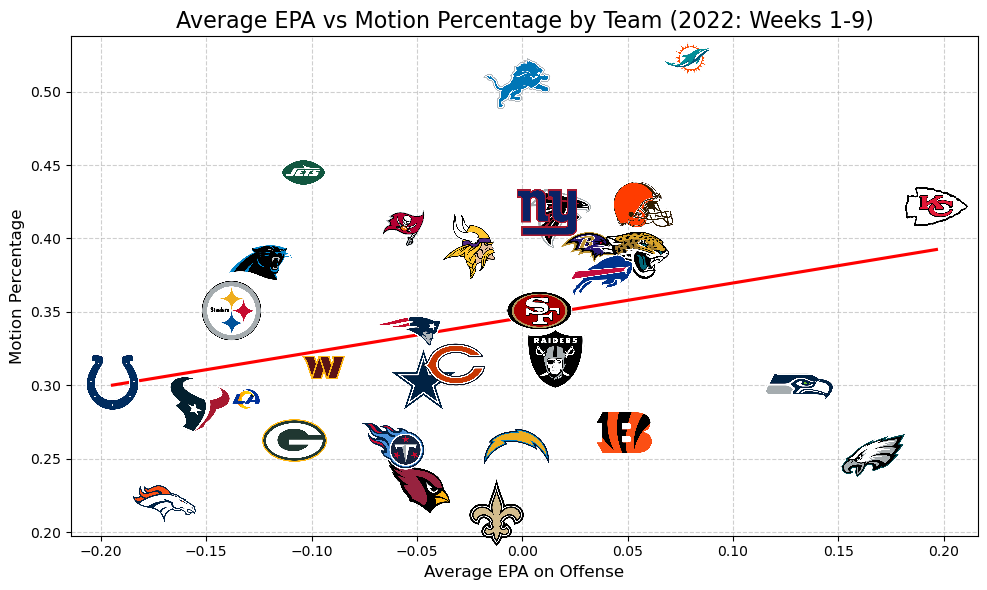

In [104]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

#make a scatterplot for the results
plt.figure(figsize=(10, 6))

#df of results
results_df = pd.DataFrame({
    'Team': nfl_teams,
    'Motion Percentage': motion_pcts,
    'Average EPA': epa_avgs
})

#plot the regression line
sns.regplot(data=results_df, x='Average EPA', y='Motion Percentage', 
            scatter_kws={'s': 100, 'alpha': 0}, line_kws={'color': 'red'}, ci=None)

#add team logos
for i, row in results_df.iterrows():
    img_path = f"logos/{row['Team']}.png"  #image path
    try:
        #load the images
        img = mpimg.imread(img_path)
        imagebox = OffsetImage(img, zoom=0.07)  
        ab = AnnotationBbox(imagebox, (row['Average EPA'], row['Motion Percentage']),
                            frameon=False, xycoords='data', boxcoords="offset points", pad=0)
        plt.gca().add_artist(ab)
    except FileNotFoundError:
        print(f"Image for team {row['Team']} not found at path: {img_path}")

#plot the scatterplot
plt.title('Average EPA vs Motion Percentage by Team (2022: Weeks 1-9)', fontsize=16)
plt.xlabel('Average EPA on Offense', fontsize=12)
plt.ylabel('Motion Percentage', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

#save image
plt.savefig('motion_vs_epa.png', dpi=300, bbox_inches='tight')
plt.show()
